<a href="https://www.kaggle.com/code/karlpetz/food-hygiene-uk-eda?scriptVersionId=105451480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import squarify
import matplotlib.pyplot as plt
import seaborn as sns


Load the data into a pandas dataframe and take a look at the overall structure of the csv file

In [2]:
data = pd.read_csv('../input/uk-food-hygiene-rating-data-london/food_hygiene_rating_data.csv')
data.head()

,Unnamed: 0,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803


It seems like we have an extra column that is just the column id so let's drop that from the dataset

In [3]:
data = data.drop('Unnamed: 0',axis=1)


As we can see below we cropped the column and can now look into the data set better

In [4]:
data.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803


Now there are a couple of questions that I have.

* Does the Local Athority impact the rating value?
* Does the Business Type imapct the rating value?
* Does the date affect rating value?
* What does the Rating key mean?
* Is there a correlation between Rating Value and Rating Date? (Pre/Post-COVID)

So Let's start investigating if the Local Authority impacts the rating value of the business

In [5]:
data['RatingValue'].unique()

array(['AwaitingInspection', '5', '2', '4', '1', '3', 'Exempt', '0',
       'AwaitingPublication'], dtype=object)

In [6]:
data['RatingValue'].value_counts()

5                      12544
4                       4483
3                       2450
AwaitingInspection      2439
Exempt                  1070
2                        675
1                        550
0                        140
AwaitingPublication        1
Name: RatingValue, dtype: int64

<AxesSubplot:title={'center':'Tree map displaying the size of the different Rating values of stores'}>

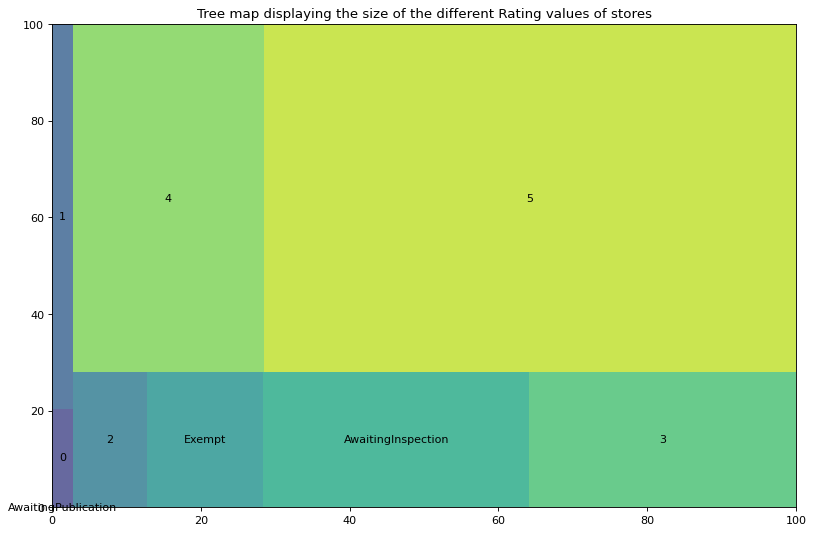

In [7]:
# labels = ['5','4', '3','AwaitingInspection','Exempt','2','1', '0','AP']

plt.figure(figsize=(12,8), dpi= 80)
plt.title('Tree map displaying the size of the different Rating values of stores')
squarify.plot(sizes=data['RatingValue'].value_counts().sort_values(),
              label=data['RatingValue'].value_counts().sort_values().index,
              color = sns.color_palette('viridis',len(data['RatingValue'].value_counts().sort_values().index)),
              alpha=.8)

As we can see most of the value are in the 5 star category with over 50% being in the 5 star category. What happens if a business is not in the 5 star category do they have to pay a fine? Is there reputational damage? 

5 – hygiene standards are very good

4 – hygiene standards are good

3 – hygiene standards are generally satisfactory

2 – some improvement is necessary

1 – major improvement is necessary

0 – urgent improvement is required


Based on the link below which I will call from hereone **UK rating scheme** *See* https://www.food.gov.uk/safety-hygiene/food-hygiene-rating-scheme

Exempted businesses are businesses that are low-risk to public health, for example, newsagents, chemist shops or visitor centres selling pre-wrapped goods that do not require refrigeration 

This means that a hygiene rating of 5, 4, and 3 are all sanitary. So over 80 % of all business are deemed sanitary.

So now lets look into the local athority before comparing local athority and the hygiene rating



In [8]:
data.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803


In [9]:
data['LocalAuthorityName'].value_counts()

Camden                        3169
Southwark                     2931
Hackney                       2652
Islington                     1925
Hillingdon                    1862
Waltham Forest                1737
Redbridge                     1525
Ealing                        1443
Greenwich                     1265
Haringey                      1189
Barking and Dagenham          1079
Newham                         821
Bexley                         363
Westminster                    324
Merton                         298
Lewisham                       297
Brent                          287
Hammersmith and Fulham         271
Bromley                        202
Lambeth                        197
Croydon                        184
Sutton                         119
Enfield                         74
City of London Corporation      69
Kingston-Upon-Thames            35
Wandsworth                      29
Tower Hamlets                    5
Name: LocalAuthorityName, dtype: int64

Most of the ratings seem to be coming from Camden and then in decreasing order the rest 

Here I have a function that creates an array of the value counts in order of a given column. I use this to properly graph and have the correct variables assigned. **IF THERE IS A BETTER VERSION OF DOING ThIS PLEASE COMMENT BECAUSE I WANT TO KNOW**

In [10]:
def stripper(values):
    label = str(data[values].loc[1:].value_counts()).split('\n')
    label.pop()
    label = [s.split('  ') for s in label]
    label = [item[0] for item in label]
    return label 

As we can see below that most of the local athorities are the camden ones and then slowly reduce

In [11]:
stripper('LocalAuthorityName')

['Camden',
 'Southwark',
 'Hackney',
 'Islington',
 'Hillingdon',
 'Waltham Forest',
 'Redbridge',
 'Ealing',
 'Greenwich',
 'Haringey',
 'Barking and Dagenham',
 'Newham',
 'Bexley',
 'Westminster',
 'Merton',
 'Lewisham',
 'Brent',
 'Hammersmith and Fulham',
 'Bromley',
 'Lambeth',
 'Croydon',
 'Sutton',
 'Enfield',
 'City of London Corporation',
 'Kingston-Upon-Thames',
 'Wandsworth',
 'Tower Hamlets']

In [12]:
data['LocalAuthorityName'].value_counts()

Camden                        3169
Southwark                     2931
Hackney                       2652
Islington                     1925
Hillingdon                    1862
Waltham Forest                1737
Redbridge                     1525
Ealing                        1443
Greenwich                     1265
Haringey                      1189
Barking and Dagenham          1079
Newham                         821
Bexley                         363
Westminster                    324
Merton                         298
Lewisham                       297
Brent                          287
Hammersmith and Fulham         271
Bromley                        202
Lambeth                        197
Croydon                        184
Sutton                         119
Enfield                         74
City of London Corporation      69
Kingston-Upon-Thames            35
Wandsworth                      29
Tower Hamlets                    5
Name: LocalAuthorityName, dtype: int64

Text(0.5, 1.0, 'Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK ')

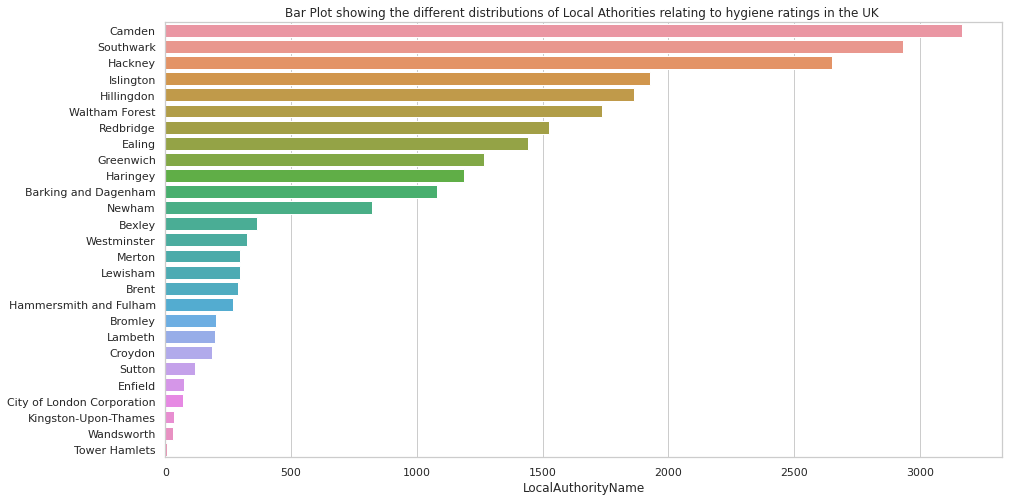

In [13]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(y=stripper('LocalAuthorityName'), x=data['LocalAuthorityName'].value_counts())
ax.set_title('Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK ')

<AxesSubplot:title={'center':'Stacked Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK '}, xlabel='LocalAuthorityName'>

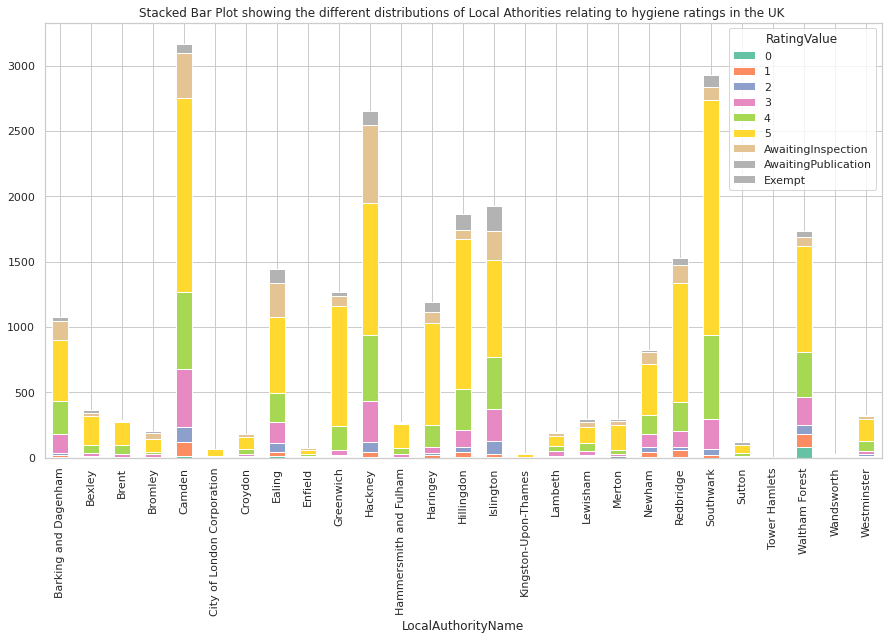

In [14]:
newFrame = data.groupby(['LocalAuthorityName'])['RatingValue'].value_counts().unstack(1)
title = 'Stacked Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK '

newFrame.plot.bar(stacked=True,  colormap ='Set2', title=title,figsize=(15,8))

This stacked Bar column is nice but for the Local Athorities where there are less ratings seeing the visualization is difficult therefore I a percentage stacked bar column is better suited for this.

<AxesSubplot:title={'center':'Stacked Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK '}, xlabel='LocalAuthorityName'>

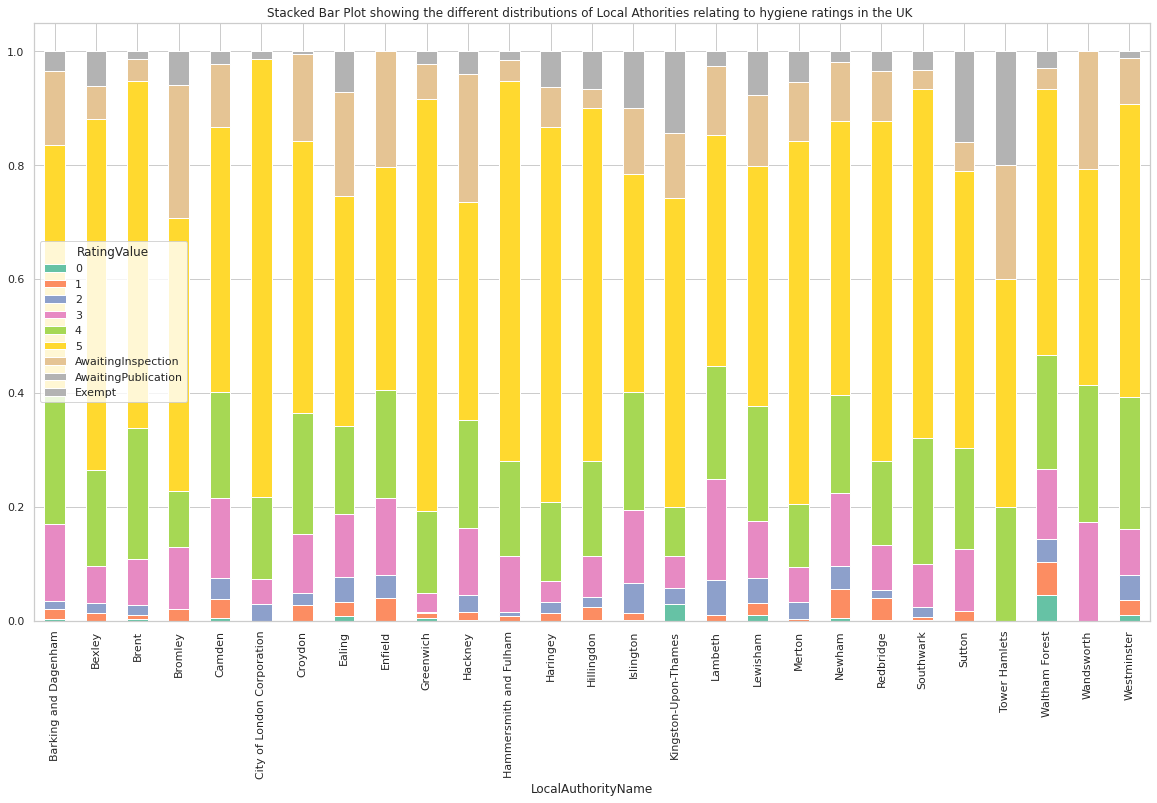

In [15]:
title = 'Stacked Bar Plot showing the different distributions of Local Athorities relating to hygiene ratings in the UK '

newFrame.div(newFrame.sum(axis=1), axis=0).plot.bar(stacked=True,  colormap ='Set2', title=title,figsize=(20,11))

The Percentage stacked bar column gives a nice visualiztation of how the different raintg counts are distributed among the local authority ratings. Overall the distribution of the health ratings semm to be more or less even. But certain local athority ranges have rated more restaurants as bad than other local athority rating. Now the question arises does the type of shop affect the average rating value of the Local Athourity?

In [16]:
data.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803


In [17]:
data['BusinessType'].value_counts()

Restaurant/Cafe/Canteen                  7307
Retailers - other                        5553
Takeaway/sandwich shop                   3102
Other catering premises                  2917
Hospitals/Childcare/Caring Premises      1338
School/college/university                1101
Pub/bar/nightclub                        1040
Mobile caterer                            608
Retailers - supermarkets/hypermarkets     536
Manufacturers/packers                     373
Hotel/bed & breakfast/guest house         308
Distributors/Transporters                 110
Importers/Exporters                        51
Farmers/growers                             8
Name: BusinessType, dtype: int64

<AxesSubplot:title={'center':'Stacked Bar Plot showing the different distributions of types of shops relating to hygiene ratings in the UK '}, xlabel='BusinessType'>

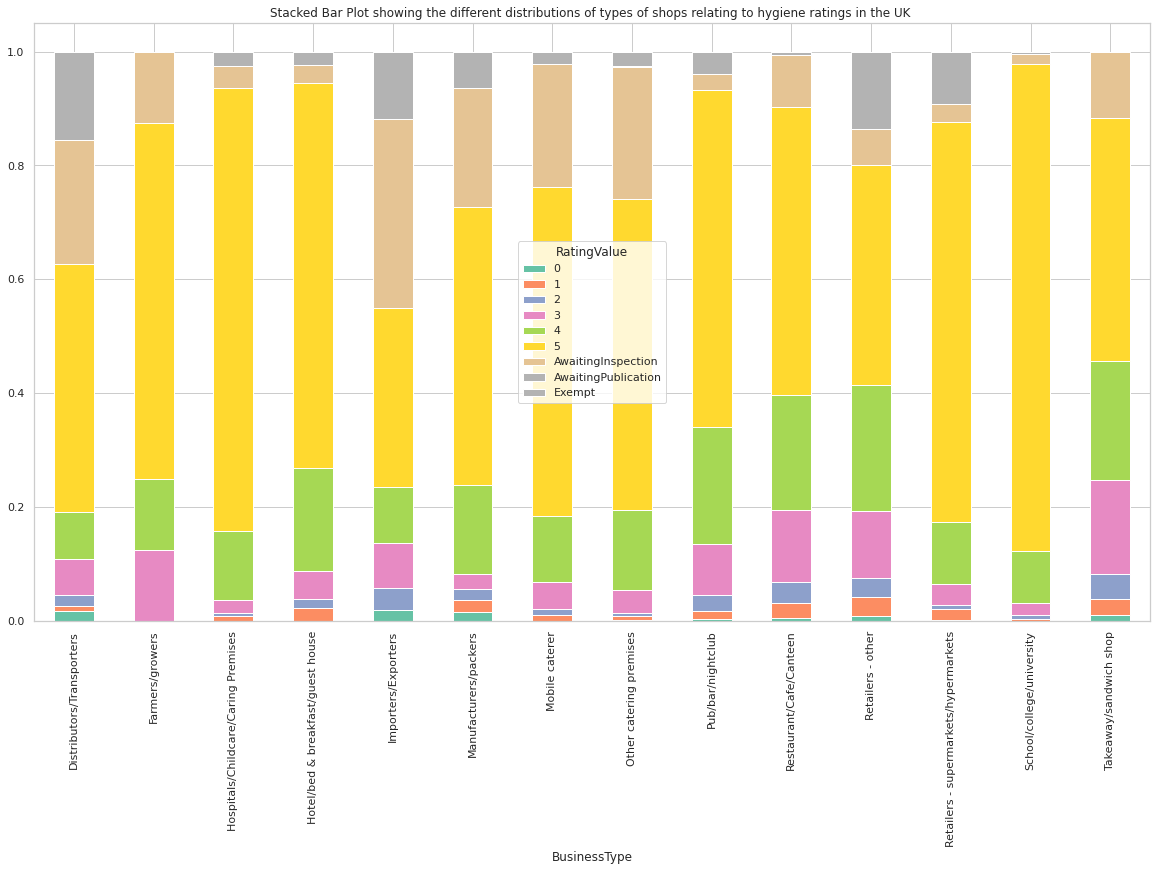

In [18]:
newFrame = data.groupby(['BusinessType'])['RatingValue'].value_counts().unstack(1)
title = 'Stacked Bar Plot showing the different distributions of types of shops relating to hygiene ratings in the UK '

newFrame.div(newFrame.sum(axis=1), axis=0).plot.bar(stacked=True,  colormap ='Set2', title=title,figsize=(20,11))

From the Stacked bar column above the Takeaway/Sandwhich shops, Retailers - other ( Great description), Restaurants/Cafe/Canteen are the most prone to being unsanitary. What would be beneficial if there would be a distinction between restaurants, Cafe and Canteens. We could make assumption based on the name of the establishment but I don't think that would be beneficial. What I did not expect at all what what the School/College/University would be so cleanly having the lowest percentage of unsanitary ratings values. 

In [19]:
import geopandas as gpd

UK = gpd.read_file('../input/uk-local-athorities-geojson/Uk_LocalAthorities.json')
UK.head()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,E06000001,E06000001,00EB,Hartlepool,None,"MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54..."
1,E06000002,E06000002,00EC,Middlesbrough,None,"MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54..."
2,E06000003,E06000003,00EE,Redcar and Cleveland,None,"MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54..."
3,E06000004,E06000004,00EF,Stockton-on-Tees,None,"MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54..."
4,E06000005,E06000005,00EH,Darlington,None,"POLYGON ((-1.43800 54.59493, -1.43554 54.59552..."


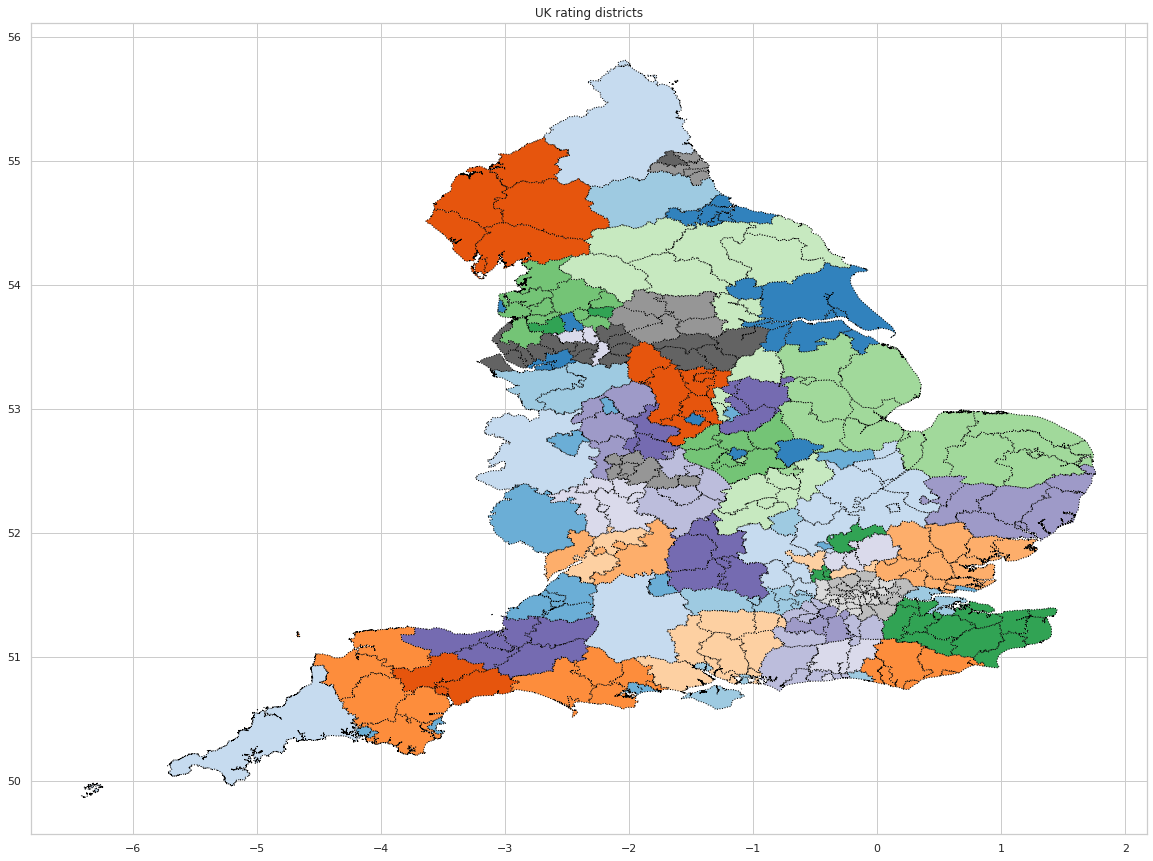

In [20]:
ax = UK.plot(figsize=(20,20), color='whitesmoke',cmap ='tab20c', linestyle=':', edgecolor='black')

plt.title('UK rating districts')

plt.show()

In [21]:
data

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803
...,...,...,...,...,...,...,...,...,...,...,...,...
24347,1030095,70963,Sure Deal African Restaurant,Restaurant/Cafe/Canteen,RM8 3UU,5,fhrs_5_en-GB,2020-02-29,501,Barking and Dagenham,0.071267,51.540357
24348,1432572,78113,Sushi and Bento House / Ban Thai/ Fusion House,Restaurant/Cafe/Canteen,RM8 3NH,5,fhrs_5_en-GB,2022-01-23,501,Barking and Dagenham,0.078451,51.537946
24349,1079143,71743,Suvai Foods UK LTD,Retailers - other,RM9 5SL,3,fhrs_3_en-GB,2021-11-18,501,Barking and Dagenham,0.141192,51.571934
24350,1292182,76637,Suyahut,Takeaway/sandwich shop,IG11 8ED,5,fhrs_5_en-GB,2020-10-22,501,Barking and Dagenham,0.129532,51.551553


In [22]:
locations = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
locations.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
locations.head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude,geometry
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799,POINT (-0.01807 51.53880)
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405,POINT (0.06476 51.50740)
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395,POINT (0.00981 51.54339)
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514,POINT (0.01242 51.51751)
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803,POINT (0.05537 51.52780)


<AxesSubplot:>

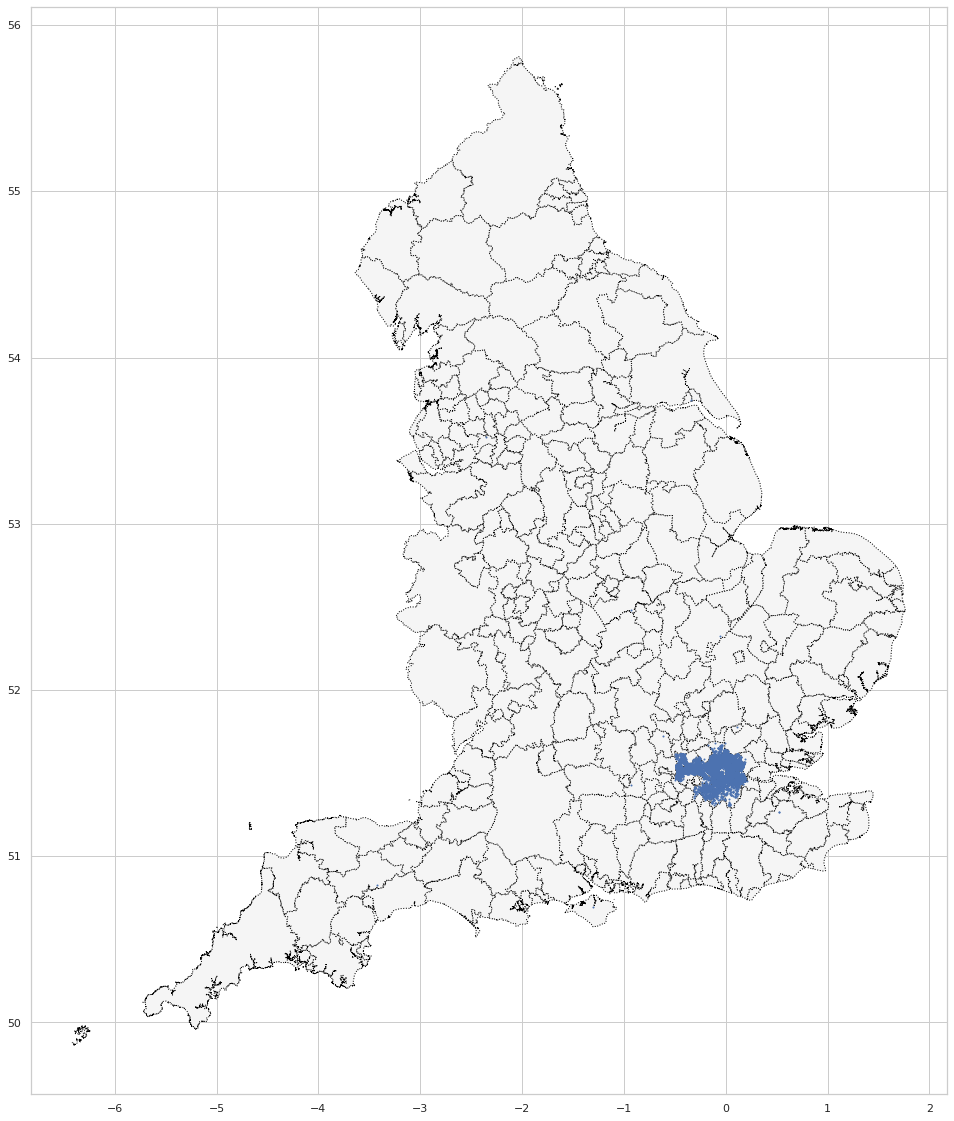

In [23]:
ax = UK.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
locations.geometry.plot(markersize=1, ax=ax)

As can be seen on the map the all of the restaurants aren't actually in the UK but in and around London. So the dataset should be relabled to Hygiene of facilities in and around London..

Now is there a correlation between the ratings and the date of the ratings? This is interesting with the addition of the COVID-19 pandemic. My hypotheses is that the rating agents got more strict with the inclusion of COVID-19. If intentional or not. 

<AxesSubplot:>

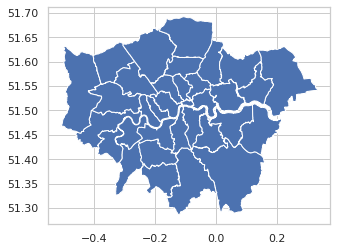

In [24]:
London = gpd.read_file('../input/london-boroughs-json/london_boroughs.json')
London.plot()

In [25]:
locations.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,PostCode,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,Longitude,Latitude,geometry
0,1438654,21/00856/FOOD,1st Base Catering,Mobile caterer,E20 2ST,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,525,Newham,-0.018066,51.538799,POINT (-0.01807 51.53880)
1,1132140,19/00459/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E16 2RD,5,fhrs_5_en-GB,2019-05-10,525,Newham,0.064757,51.507405,POINT (0.06476 51.50740)
2,1132134,19/00447/FOOD,53.5 Degrees,Restaurant/Cafe/Canteen,E15 4LZ,5,fhrs_5_en-GB,2019-05-14,525,Newham,0.009809,51.543395,POINT (0.00981 51.54339)
3,1260384,20/00288/FOOD,55 Square Limited,Restaurant/Cafe/Canteen,E16 1EN,2,fhrs_2_en-GB,2020-12-09,525,Newham,0.012417,51.517514,POINT (0.01242 51.51751)
4,1389145,21/00354/FOOD,7 Mamas Ltd,Takeaway/sandwich shop,E6 3HN,5,fhrs_5_en-GB,2022-01-05,525,Newham,0.055372,51.527803,POINT (0.05537 51.52780)


<AxesSubplot:title={'center':'Map of London'}>

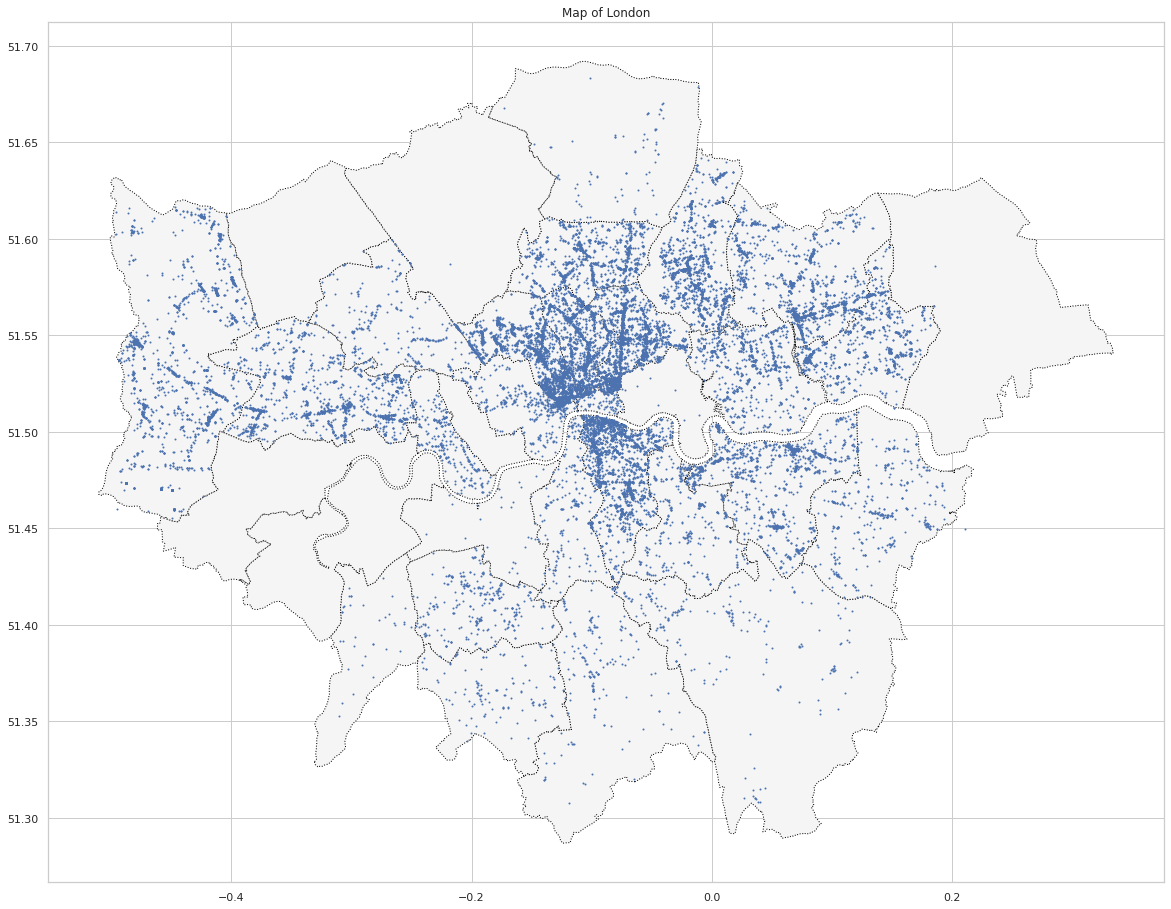

In [26]:
locations_london = locations.loc[(locations.Latitude < 51.7 )& (locations.Latitude > 51.2) & (locations.Longitude < 0.4 )& (locations.Longitude > -0.6)]
ax = London.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
plt.title('Map of London')
locations_london.geometry.plot(markersize=1, ax=ax)

In [27]:
import plotly.express as px

fig = px.density_mapbox(locations_london, lat='Latitude', lon='Longitude', z='RatingValue', radius=3,
                        center=dict(lat=51.5, lon=-0.2), zoom=8,
                        mapbox_style="stamen-terrain")
                          
fig.show()

It seems like most highly rated establishments are in the center of London. Now there are large spots of data missing (since I am assuming that there are restaurants in Richmond just not being displayed). What do you think of that data? What graph would you like to see?